In [1]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r"C:\Users\abdul\Career-Foundry-Assignment4-Instacart-Basket-Analysis"

In [3]:
ords_prods_merge=pd.read_pickle(os.path.join(path,'02_Data','Prepared-Data', 'ords_prods_merg_updated_48.pkl'))

In [4]:
ords_prods_merge.head(5)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,department_id,prices,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_prior_order_median,criteria_flag
0,0,0,2539329,1,prior,1,2,8,7.0,196,...,7,9.0,Regularly Busy Days,Average Orders,10,New Customer,6.367797,Low spender,20.0,Regular Customer
1,1,1,2398795,1,prior,2,3,7,15.0,196,...,7,9.0,Least Busy Days,Average Orders,10,New Customer,6.367797,Low spender,20.0,Regular Customer
2,2,2,473747,1,prior,3,3,12,21.0,196,...,7,9.0,Least Busy Days,Most Orders,10,New Customer,6.367797,Low spender,20.0,Regular Customer
3,3,3,2254736,1,prior,4,4,7,29.0,196,...,7,9.0,Least Busy Days,Average Orders,10,New Customer,6.367797,Low spender,20.0,Regular Customer
4,4,4,431534,1,prior,5,4,15,28.0,196,...,7,9.0,Least Busy Days,Most Orders,10,New Customer,6.367797,Low spender,20.0,Regular Customer


In [5]:
ords_prods_merge.shape

(32404859, 25)

## 1. Bar Charts

<AxesSubplot:>

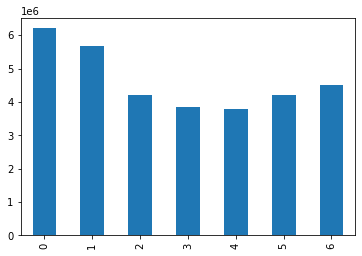

In [6]:
#create a Bar Chart
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods_merge['order_dow'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_dow, dtype: int64

In [8]:
ords_prods_merge['order_dow'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_dow, dtype: int64

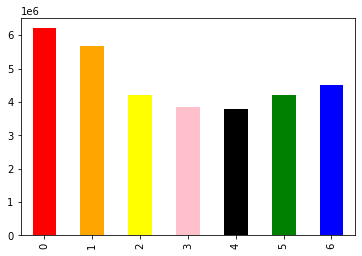

In [9]:
bar=ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=['red', 'orange','yellow','pink','black','green','blue'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

## 2. Histogram

<AxesSubplot:ylabel='Frequency'>

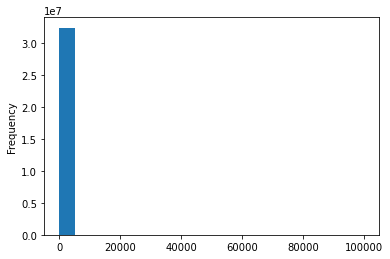

In [11]:
ords_prods_merge['prices'].plot.hist(bins=20)

In [12]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

### 3.Scatter Plots

<AxesSubplot:xlabel='prices', ylabel='prices'>

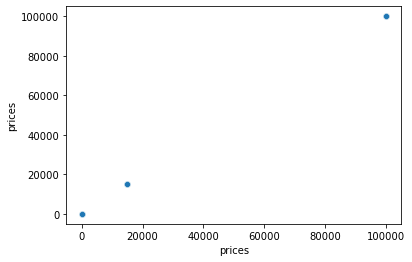

In [16]:
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

In [17]:
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,department_id,prices,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_prior_order_median,criteria_flag
10030345,171,171,912404,17,prior,12,2,14,5.0,21553,...,16,14900.0,Regularly Busy Days,Most Orders,40,Regular Customer,108.648299,High spender,5.0,Frequent customer
10030346,181,181,603376,17,prior,22,6,16,4.0,21553,...,16,14900.0,Regularly Busy Days,Most Orders,40,Regular Customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,1944,3264360,135,prior,2,2,21,13.0,21553,...,16,14900.0,Regularly Busy Days,Average Orders,4,New Customer,1154.792308,High spender,11.5,Regular Customer
10030348,1945,1945,892534,135,prior,3,0,8,12.0,21553,...,16,14900.0,Busiest Days,Average Orders,4,New Customer,1154.792308,High spender,11.5,Regular Customer
10030349,5708,5708,229704,342,prior,8,1,19,30.0,21553,...,16,14900.0,Busiest Days,Average Orders,16,Regular Customer,114.426619,High spender,20.0,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,3386542,2249946,204099,prior,29,0,8,4.0,33664,...,16,99999.0,Busiest Days,Average Orders,39,Regular Customer,1106.743956,High spender,4.0,Frequent customer
29166210,3386544,3386544,2363282,204099,prior,31,0,9,2.0,33664,...,16,99999.0,Busiest Days,Most Orders,39,Regular Customer,1106.743956,High spender,4.0,Frequent customer
29166211,3391313,3391313,3181945,204395,prior,13,3,15,8.0,33664,...,16,99999.0,Least Busy Days,Most Orders,15,Regular Customer,451.153540,High spender,5.0,Frequent customer
29166212,3405096,3405096,2486215,205227,prior,7,3,20,4.0,33664,...,16,99999.0,Least Busy Days,Average Orders,12,Regular Customer,1178.381871,High spender,7.0,Frequent customer


# Removing the Outliers with np.nan

In [18]:
#ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices']=np.nan

In [19]:
ords_prods_merge1=ords_prods_merge.loc[ords_prods_merge['prices']<=100]

In [20]:
ords_prods_merge1.shape

(32399732, 25)

In [21]:
ords_prods_merge1['prices'].max()

25.0

In [22]:
ords_prods_merge1.to_pickle(os.path.join(path,'02_Data', 'Prepared-Data','ords_prods_merg_up_48_cl.pkl'))

# 2.1 Histogram

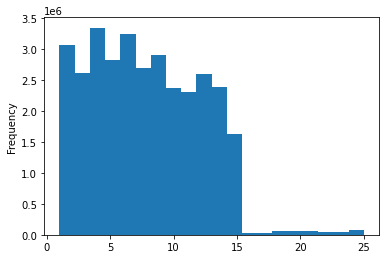

In [23]:
hist=ords_prods_merge1['prices'].plot.hist(bins=20)

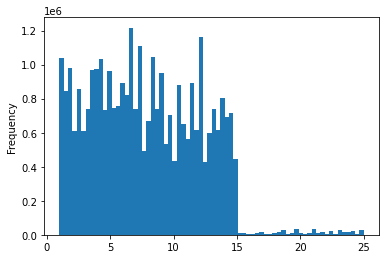

In [24]:
hist1=ords_prods_merge1['prices'].plot.hist(bins=70)

In [25]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 4. Sampling

In [26]:
np.random.seed(4)
#Create a list holding True/False values to the test np.random.rand()>=0.7
dev=np.random.rand(len(ords_prods_merge1))<=0.7

In [27]:
dev

array([False,  True, False, ..., False,  True,  True])

In [28]:
# store 70% of the sample in the dataframe big
big= ords_prods_merge1[dev]

In [29]:
# store 30% of the sample in the dataframe small
small= ords_prods_merge1[~dev]

In [30]:
len(ords_prods_merge1)

32399732

In [31]:
len(big)

22680123

In [32]:
len(small)

9719609

In [33]:
len(big)+len(small)

32399732

In [34]:
df_2=small[['order_dow', 'prices']]

In [35]:
df_2.shape

(9719609, 2)

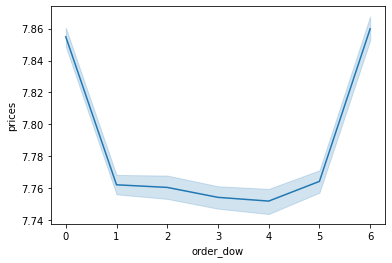

In [36]:
line= sns.lineplot(data=df_2, x='order_dow', y='prices')

In [37]:
df_4=ords_prods_merge1[['order_dow', 'prices']]

KeyboardInterrupt: 

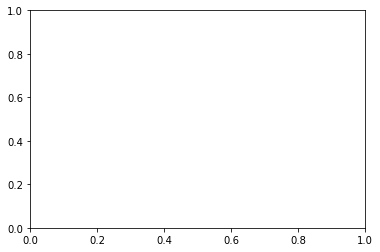

In [38]:
line_2= sns.lineplot(data=df_4, x='order_dow', y='prices')